In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
data = pd.DataFrame({
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'feature3': np.random.randn(1000),
    'sales': np.random.rand(1000) * 1000
})

# Features and target
X = data[['feature1', 'feature2', 'feature3']]
y = data['sales']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build the neural network model with Leaky ReLU activation
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [10]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


In [12]:
# Train the model over 300 epochs
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83482.1797 - mae: 247.8462 - val_loss: 96531.3750 - val_mae: 268.1679
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76096.0234 - mae: 233.7766 - val_loss: 97067.4375 - val_mae: 268.0953
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78568.4609 - mae: 240.9607 - val_loss: 96825.5938 - val_mae: 268.2897
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76663.9922 - mae: 236.3109 - val_loss: 96073.1875 - val_mae: 268.3914
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77861.0000 - mae: 240.5897 - val_loss: 96287.8828 - val_mae: 267.9614
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75278.2656 - mae: 232.8703 - val_loss: 96833.9609 - val_mae: 268.0547
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79934.7500 - mae: 243.8280 - val_loss: 96114.5391 - val_mae: 268.2014
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81118.8125 - mae: 240.9389 - val_loss:

In [13]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75922.8906 - mae: 236.7225  
Test MAE: 232.5319


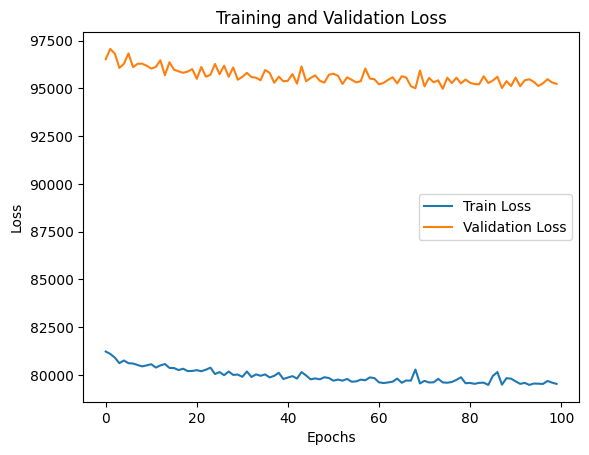

In [14]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()